In [61]:
# basic operations
import numpy as np

# for dataframe manipulations
import pandas as pd 

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# reading the data and also checking the computation time
data = pd.read_csv('FIFA.csv')

# lets also check the shape of the dataset
print(data.shape)

(18207, 89)


In [63]:
# lets check the column names present in the data
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

### Feature Engineering

In [64]:
# We are deleting the Records where the Joining date is Missing
print("Before Deleting Missing Values :", data['Joined'].isnull().sum())

# lets remove the Missing Values
data.dropna(subset = ['Joined'], inplace = True)
print("After Deleting Missing Values :", data['Joined'].isnull().sum())

Before Deleting Missing Values : 1553
After Deleting Missing Values : 0


In [68]:
# Lets Calculate the longest membership in the club
import datetime

# lets fetch the Current Time
now = datetime.datetime.now()

# Lets Extract the Joining Year from the JoinYear Column
data['Join_year'] = data.Joined.map(lambda x: x.split(',')[1].split(' ')[1])

# Lets Calculate the Years of Membership
data['Years_of_member'] = (data.Join_year.dropna().map(lambda x: now.year - int(x))).astype('int')

In [69]:
membership = data[['Name', 'Club', 'Years_of_member']].sort_values(by = 'Years_of_member', ascending = False).head(10)
membership.set_index('Name', inplace=True)
membership.style.background_gradient(cmap = 'Reds')

,Club,Years_of_member
Name,,
O. Pérez,Pachuca,30
M. Ogasawara,Kashima Antlers,23
H. Sogahata,Kashima Antlers,23
M. Al Shalhoub,Al Hilal,23
S. Narazaki,Nagoya Grampus,22
M. Wölfli,BSC Young Boys,21
K. Kitamoto,Vissel Kobe,21
C. Källqvist,BK Häcken,20
Y. Endo,Gamba Osaka,20


In [65]:
# lets remove all the Records with Missing Values
data.fillna(0, inplace = True)

# lets check the shape of the dataset
data.shape

(16654, 89)

In [66]:
# creating new features by aggregating the features

# Aggregating Defending Skills
data['defending'] = (data['Marking'] + data['StandingTackle'] + data['SlidingTackle'])/3

# Aggregating General Skills
data['general'] = (data['HeadingAccuracy'] + data['Dribbling'] + data['Curve'] +
                               data['BallControl'])/4

# Aggregating Mental Skills
data['mental'] = (data['Aggression'] + data['Interceptions'] + data['Positioning'] + 
                        data['Vision'] + data['Composure'])/5

# Aggregating Passing Skills
data['passing'] = (data['Crossing'] + data['ShortPassing'] + data['LongPassing'])/3

# Aggregating Mobility Skills
data['mobility'] = (data['Acceleration'] + data['SprintSpeed'] +  data['Agility'] + 
                    data['Reactions'])/4

# Aggregating Power Skills
data['power'] = (data['Balance'] + data['Jumping'] + data['Stamina'] + 
                               data['Strength'])/4

# Aggregating Rating Skills
data['rating'] = (data['Potential'] + data['Overall'])/2

# Aggregating Shooting Skills
data['shooting'] = (data['Finishing'] + data['Volleys'] + data['FKAccuracy'] + 
                            data['ShotPower'] + data['LongShots'] + data['Penalties'])/6

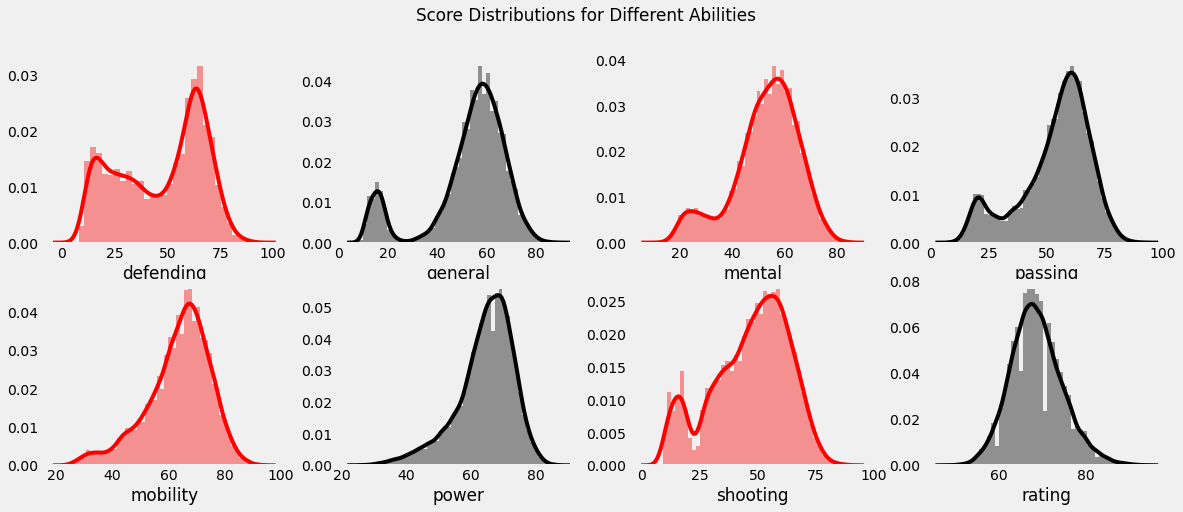

In [67]:
# lets check the Distribution of Scores of Different Skills
plt.rcParams['figure.figsize'] = (18, 7)
plt.style.use('fivethirtyeight')

plt.subplot(2, 4, 1)
sns.distplot(data['defending'], color = 'red')
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(data['general'], color = 'black')
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(data['mental'], color = 'red')
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(data['passing'], color = 'black')
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(data['mobility'], color = 'red')
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(data['power'], color = 'black')
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(data['shooting'], color = 'red')
plt.grid()

plt.subplot(2, 4, 8)
sns.distplot(data['rating'], color = 'black')
plt.grid()

plt.suptitle('Score Distributions for Different Abilities')
plt.show()